<a href="https://colab.research.google.com/github/fabiobaroliveira/gerador_base_de_dados/blob/main/vendas_locadora_seminovos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.9 MB/s eta 0:00:00


In [8]:
import pandas as pd
import random
from faker import Faker
fake = Faker('pt_BR')

# Listas de valores possíveis

marcas_modelos = {
    "Fiat" : [ "Argo", "Cronos", "Pulse"],
    "Volkswagen" : [ "Polo", "Virtus", "Nivus"],
    "Hyundai" : ["HB20", "HB20S","Creta"],
    "GM" : ["Onix", "Onix Sedan", "Tracker"]
}

formas_pagamento = ["À vista", "Financiamento", "Consórcio", "Leasing"]
cores = ["Preto", "Prata", "Branco", "Cinza", "Vermelho", "Azul"]
sexo_opcoes = ["Masculino", "Feminino"]

# Definindo pesos para cada probabilidade
pesos_marcas = [ 37, 30, 26, 12] # dividido em  porcentagem, ficando Fiat com 37%, VW com 30% e assim por diante
pesos_formas_pagamento = [20, 60, 15, 5]
pesos_sexo = [42, 58]
pesos_cores = [20, 20, 20, 20, 10, 10]

# Gerando os dados fictícios

dados = []

for i in range(1, 10951):
    sexo = random.choices(sexo_opcoes, weights=pesos_sexo, k=1)[0] # Escolha do sexo com base nos pesos
    nome = fake.first_name_male() if sexo == "Masculino" else fake.first_name_female()
    sobrenome = fake.last_name()
    nome_completo = f"{nome} {sobrenome}"
    idade = random.randint(18, 70)
    cpf = fake.cpf()
    email = fake.email()
    telefone = fake.phone_number()
    cidade = fake.city()
    estado = fake.state_abbr()
    marca = random.choices(list(marcas_modelos.keys()), weights=pesos_marcas, k=1)[0] # Escolha da marca com base nos pesos
    modelo = random.choice(marcas_modelos[marca])
    ano_fabricacao = random.randint(2013, 2023) #Escolha da faixa de anos de fabricação
    cor = random.choices(cores, weights=pesos_cores, k=1)[0]
    valor_venda = round(random.uniform(30000, 250000), 2) # Faixa de valores dos veículos
    data_venda = fake.date_between(start_date="-8y", end_date="today") #Escolha do período das vendas, sendo 8Y para os ultimos 8 anos com a ultima da data sendo hoje
    forma_pagamento = random.choices(formas_pagamento, weights=pesos_formas_pagamento, k=1)[0]

    dados.append([
        i, nome_completo, idade, cpf, sexo, email, telefone, cidade, estado,
        marca, modelo, ano_fabricacao, cor, valor_venda, data_venda, forma_pagamento
    ])

# Criando o DataFrame
colunas = ["ID", "Nome Completo", "Idade", "CPF", "Sexo", "E-mail",
           "Telefone", "Cidade", "Estado", "Marca", "Modelo", "Ano_fabricacao",
           "Cor", "Valor_venda", "Data_venda", "Forma_pagamento"]

df_vendas = pd.DataFrame(dados, columns=colunas)

# Exibindo as primeiras linhas do DataFrame
df_vendas.head()

,ID,Nome Completo,Idade,CPF,Sexo,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Rebeca Albuquerque,68,207.943.185-41,Feminino,vargasgiovanna@example.com,+55 (081) 5761 7273,Nascimento da Mata,CE,Volkswagen,Polo,2018,Azul,203759.53,2023-09-10,Financiamento
1,2,Luísa Cavalcante,25,469.507.823-65,Feminino,eda-mata@example.net,+55 (081) 0376 5899,Freitas de Almeida,ES,Hyundai,Creta,2021,Azul,238712.50,2023-03-30,Financiamento
2,3,Ana Liz Aragão,45,486.105.723-07,Feminino,da-luzjade@example.net,41 8071 2364,Azevedo do Amparo,PE,Hyundai,HB20,2022,Preto,234231.04,2024-08-30,Financiamento
3,4,Catarina Sousa,69,451.827.096-76,Feminino,tfonseca@example.com,+55 (041) 5059-6077,Vasconcelos do Sul,GO,Fiat,Argo,2016,Azul,69423.08,2023-06-21,Financiamento
4,5,Antônio Melo,30,497.238.610-03,Masculino,francisco90@example.com,+55 21 1657-6720,Pastor de Barbosa,SE,Hyundai,HB20,2017,Vermelho,152777.03,2023-09-12,Financiamento


In [10]:
# @title Criando um arquivo .csv

vendas_csv = "vendas.csv"

df_vendas.to_csv(vendas_csv, index=False)

print(f"Arquivo CSV gerado em: {vendas_csv}")

Arquivo CSV gerado em: vendas.csv


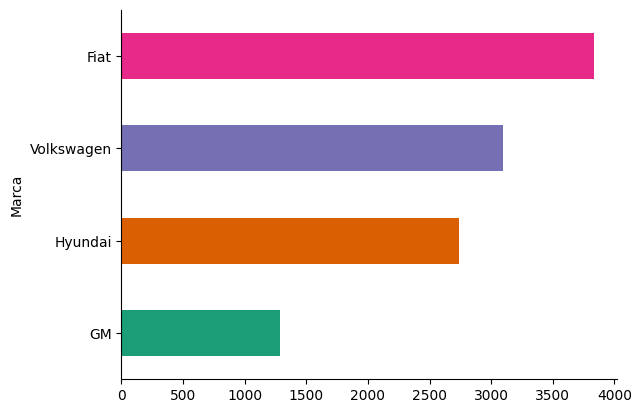

In [9]:
# @title Gráfico para Vizualização de Divisão de Vendas por Marca

from matplotlib import pyplot as plt
import seaborn as sns

# Coloca em ordem crescente
(df_vendas.groupby("Marca").size().sort_values().plot(kind="barh", color=sns.palettes.mpl_palette("Dark2")))

# Remove bordas desnecessárias
plt.gca().spines[['top', 'right']].set_visible(False)